<a href="https://colab.research.google.com/github/kbunwong/Inventory-Optimization-Analysis/blob/main/Inventory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inventory & Sale Analysis

In [20]:
# Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Import data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Projects/Inventory /Grocery_Inventory_and_Sales_Dataset.csv')


In [23]:
df

,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
0,29-205-1132,Sushi Rice,Grains & Pulses,38-037-1699,Jaxnation,22,72,70,$4.50,8/16/2024,6/29/2024,9/19/2024,48 Del Sol Trail,32,19,Discontinued
1,40-681-9981,Arabica Coffee,Beverages,54-470-2479,Feedmix,45,77,2,$20.00,11/1/2024,5/29/2024,5/8/2024,36 3rd Place,85,1,Discontinued
2,06-955-3428,Black Rice,Grains & Pulses,54-031-2945,Vinder,30,38,83,$6.00,8/3/2024,6/10/2024,9/22/2024,3296 Walton Court,31,34,Backordered
3,71-594-6552,Long Grain Rice,Grains & Pulses,63-492-7603,Brightbean,12,59,62,$1.50,12/8/2024,2/19/2025,4/17/2024,3 Westerfield Crossing,95,99,Active
4,57-437-1828,Plum,Fruits & Vegetables,54-226-4308,Topicstorm,37,30,74,$4.00,7/3/2024,10/11/2024,10/5/2024,15068 Scoville Court,62,25,Backordered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,82-977-7752,Spinach,Fruits & Vegetables,57-473-8672,Shuffledrive,88,78,17,$2.50,9/6/2024,12/28/2024,11/4/2024,58 Corscot Terrace,58,21,Active
986,62-393-9939,Cheddar Cheese,Dairy,93-877-9384,Gabcube,60,9,89,$9.00,6/1/2024,6/2/2024,10/5/2024,5 Oxford Pass,95,63,Active
987,31-745-6850,Cabbage,Fruits & Vegetables,96-215-2767,Lajo,94,90,12,$0.90,10/3/2024,10/24/2024,11/1/2024,081 Jana Lane,98,71,Active
988,86-692-2312,Avocado Oil,Oils & Fats,77-783-4107,Dazzlesphere,30,48,52,$10.00,6/11/2024,12/7/2024,4/30/2024,00616 Manitowish Parkway,22,78,Active


In [24]:
# Check NULL and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_ID               990 non-null    object
 1   Product_Name             990 non-null    object
 2   Catagory                 989 non-null    object
 3   Supplier_ID              990 non-null    object
 4   Supplier_Name            990 non-null    object
 5   Stock_Quantity           990 non-null    int64 
 6   Reorder_Level            990 non-null    int64 
 7   Reorder_Quantity         990 non-null    int64 
 8   Unit_Price               990 non-null    object
 9   Date_Received            990 non-null    object
 10  Last_Order_Date          990 non-null    object
 11  Expiration_Date          990 non-null    object
 12  Warehouse_Location       990 non-null    object
 13  Sales_Volume             990 non-null    int64 
 14  Inventory_Turnover_Rate  990 non-null    i

In [25]:
df.isnull().sum()

,0
Product_ID,0
Product_Name,0
Catagory,1
Supplier_ID,0
Supplier_Name,0
Stock_Quantity,0
Reorder_Level,0
Reorder_Quantity,0
Unit_Price,0
Date_Received,0


In [26]:
df['Catagory'].isnull

<bound method Series.isnull of 0          Grains & Pulses
1                Beverages
2          Grains & Pulses
3          Grains & Pulses
4      Fruits & Vegetables
              ...         
985    Fruits & Vegetables
986                  Dairy
987    Fruits & Vegetables
988            Oils & Fats
989    Fruits & Vegetables
Name: Catagory, Length: 990, dtype: object>

In [27]:
df[df['Catagory'].isnull()]

,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
685,10-378-9729,Cabbage,NaN,83-941-9620,Rooxo,69,21,68,$66.55,12/23/2024,11/26/2024,9/21/2024,2 Butterfield Pass,36,35,Discontinued


In [28]:
# Handling NULL
df[df['Product_Name'] == 'Cabbage']

,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
23,67-025-1245,Cabbage,Fruits & Vegetables,28-575-0716,Chatterbridge,88,46,55,$1.00,4/9/2024,3/6/2024,8/12/2024,51890 Lindbergh Terrace,73,63,Active
501,21-013-3508,Cabbage,Fruits & Vegetables,64-489-8494,Meevee,12,95,49,$1.00,6/9/2024,6/13/2024,11/10/2024,84305 Fair Oaks Plaza,25,23,Backordered
521,79-428-8753,Cabbage,Fruits & Vegetables,29-521-7910,Skivee,62,79,95,$1.00,5/16/2024,7/6/2024,12/30/2024,9 Holmberg Circle,34,12,Active
652,45-380-4627,Cabbage,Fruits & Vegetables,20-201-5639,Zoombox,90,1,40,$0.90,10/20/2024,1/11/2025,2/16/2025,0 Thackeray Point,52,19,Discontinued
685,10-378-9729,Cabbage,NaN,83-941-9620,Rooxo,69,21,68,$66.55,12/23/2024,11/26/2024,9/21/2024,2 Butterfield Pass,36,35,Discontinued
788,75-927-9108,Cabbage,Fruits & Vegetables,27-406-7972,Topdrive,24,32,17,$1.00,9/29/2024,6/17/2024,7/2/2024,43 Washington Street,55,72,Discontinued
806,82-538-4809,Cabbage,Fruits & Vegetables,74-357-2990,Twitternation,83,61,4,$1.00,9/16/2024,11/5/2024,10/24/2024,700 Northland Crossing,35,7,Backordered
987,31-745-6850,Cabbage,Fruits & Vegetables,96-215-2767,Lajo,94,90,12,$0.90,10/3/2024,10/24/2024,11/1/2024,081 Jana Lane,98,71,Active


In [30]:
df['Catagory'].fillna('Fruits & Vegetables', inplace=True)

In [31]:
df.isnull().sum()

,0
Product_ID,0
Product_Name,0
Catagory,0
Supplier_ID,0
Supplier_Name,0
Stock_Quantity,0
Reorder_Level,0
Reorder_Quantity,0
Unit_Price,0
Date_Received,0


In [32]:
df[df['Product_Name'] == 'Cabbage']

,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
23,67-025-1245,Cabbage,Fruits & Vegetables,28-575-0716,Chatterbridge,88,46,55,$1.00,4/9/2024,3/6/2024,8/12/2024,51890 Lindbergh Terrace,73,63,Active
501,21-013-3508,Cabbage,Fruits & Vegetables,64-489-8494,Meevee,12,95,49,$1.00,6/9/2024,6/13/2024,11/10/2024,84305 Fair Oaks Plaza,25,23,Backordered
521,79-428-8753,Cabbage,Fruits & Vegetables,29-521-7910,Skivee,62,79,95,$1.00,5/16/2024,7/6/2024,12/30/2024,9 Holmberg Circle,34,12,Active
652,45-380-4627,Cabbage,Fruits & Vegetables,20-201-5639,Zoombox,90,1,40,$0.90,10/20/2024,1/11/2025,2/16/2025,0 Thackeray Point,52,19,Discontinued
685,10-378-9729,Cabbage,Fruits & Vegetables,83-941-9620,Rooxo,69,21,68,$66.55,12/23/2024,11/26/2024,9/21/2024,2 Butterfield Pass,36,35,Discontinued
788,75-927-9108,Cabbage,Fruits & Vegetables,27-406-7972,Topdrive,24,32,17,$1.00,9/29/2024,6/17/2024,7/2/2024,43 Washington Street,55,72,Discontinued
806,82-538-4809,Cabbage,Fruits & Vegetables,74-357-2990,Twitternation,83,61,4,$1.00,9/16/2024,11/5/2024,10/24/2024,700 Northland Crossing,35,7,Backordered
987,31-745-6850,Cabbage,Fruits & Vegetables,96-215-2767,Lajo,94,90,12,$0.90,10/3/2024,10/24/2024,11/1/2024,081 Jana Lane,98,71,Active


In [33]:
df.head()

,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
0,29-205-1132,Sushi Rice,Grains & Pulses,38-037-1699,Jaxnation,22,72,70,$4.50,8/16/2024,6/29/2024,9/19/2024,48 Del Sol Trail,32,19,Discontinued
1,40-681-9981,Arabica Coffee,Beverages,54-470-2479,Feedmix,45,77,2,$20.00,11/1/2024,5/29/2024,5/8/2024,36 3rd Place,85,1,Discontinued
2,06-955-3428,Black Rice,Grains & Pulses,54-031-2945,Vinder,30,38,83,$6.00,8/3/2024,6/10/2024,9/22/2024,3296 Walton Court,31,34,Backordered
3,71-594-6552,Long Grain Rice,Grains & Pulses,63-492-7603,Brightbean,12,59,62,$1.50,12/8/2024,2/19/2025,4/17/2024,3 Westerfield Crossing,95,99,Active
4,57-437-1828,Plum,Fruits & Vegetables,54-226-4308,Topicstorm,37,30,74,$4.00,7/3/2024,10/11/2024,10/5/2024,15068 Scoville Court,62,25,Backordered


In [35]:
# Change data types
df['Unit_Price'] = df['Unit_Price'].replace('[\$,]', '', regex=True).astype(float)

df['Date_Received'] = pd.to_datetime(df['Date_Received'])
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])
df['Expiration_Date'] = pd.to_datetime(df['Expiration_Date'])


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product_ID               990 non-null    object        
 1   Product_Name             990 non-null    object        
 2   Catagory                 990 non-null    object        
 3   Supplier_ID              990 non-null    object        
 4   Supplier_Name            990 non-null    object        
 5   Stock_Quantity           990 non-null    int64         
 6   Reorder_Level            990 non-null    int64         
 7   Reorder_Quantity         990 non-null    int64         
 8   Unit_Price               990 non-null    float64       
 9   Date_Received            990 non-null    datetime64[ns]
 10  Last_Order_Date          990 non-null    datetime64[ns]
 11  Expiration_Date          990 non-null    datetime64[ns]
 12  Warehouse_Location       990 non-nul

In [38]:
df.tail(10)

,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
980,53-008-2419,Jasmine Rice,Grains & Pulses,86-841-6074,Skyba,62,36,96,4.75,2024-04-03,2024-04-10,2024-05-27,63 Debra Park,31,25,Discontinued
981,39-358-3340,Basmati Rice,Grains & Pulses,86-841-4440,Yamia,71,60,62,4.50,2024-08-27,2024-03-25,2024-03-14,308 Doe Crossing Pass,60,63,Discontinued
982,28-146-2641,Parmesan Cheese,Dairy,82-995-0739,BlogXS,38,67,66,12.00,2024-04-01,2024-12-21,2024-04-08,73 Graedel Street,35,24,Discontinued
983,83-556-0996,Powdered Sugar,Grains & Pulses,81-234-0741,Jabberstorm,88,34,94,2.40,2024-12-27,2025-02-20,2024-10-30,53 Forest Run Plaza,95,63,Active
984,53-805-9523,Sourdough Bread,Bakery,99-864-0256,Rhyloo,40,30,65,4.50,2024-07-02,2024-03-19,2024-05-14,94 Mallory Center,54,29,Active
985,82-977-7752,Spinach,Fruits & Vegetables,57-473-8672,Shuffledrive,88,78,17,2.50,2024-09-06,2024-12-28,2024-11-04,58 Corscot Terrace,58,21,Active
986,62-393-9939,Cheddar Cheese,Dairy,93-877-9384,Gabcube,60,9,89,9.00,2024-06-01,2024-06-02,2024-10-05,5 Oxford Pass,95,63,Active
987,31-745-6850,Cabbage,Fruits & Vegetables,96-215-2767,Lajo,94,90,12,0.90,2024-10-03,2024-10-24,2024-11-01,081 Jana Lane,98,71,Active
988,86-692-2312,Avocado Oil,Oils & Fats,77-783-4107,Dazzlesphere,30,48,52,10.00,2024-06-11,2024-12-07,2024-04-30,00616 Manitowish Parkway,22,78,Active
989,28-044-4102,Papaya,Fruits & Vegetables,93-358-1118,Yakijo,19,28,83,4.50,2024-11-26,2024-03-01,2024-08-27,309 Burning Wood Center,91,73,Discontinued


In [39]:
# Check for duplicate values
df.duplicated().sum()

np.int64(0)

In [40]:
df[df.duplicated(subset=['Product_Name', 'Catagory', 'Supplier_ID'], keep=False)]

,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status


In [41]:
df.duplicated(subset=['Product_Name', 'Catagory', 'Supplier_ID'], keep=False).sum()

np.int64(0)

In [42]:
# Change column name
df.rename(columns={'Catagory': 'Category'}, inplace=True)

In [43]:
print(df.columns)

Index(['Product_ID', 'Product_Name', 'Category', 'Supplier_ID',
       'Supplier_Name', 'Stock_Quantity', 'Reorder_Level', 'Reorder_Quantity',
       'Unit_Price', 'Date_Received', 'Last_Order_Date', 'Expiration_Date',
       'Warehouse_Location', 'Sales_Volume', 'Inventory_Turnover_Rate',
       'Status'],
      dtype='object')


In [44]:
print(df.columns.tolist())

['Product_ID', 'Product_Name', 'Category', 'Supplier_ID', 'Supplier_Name', 'Stock_Quantity', 'Reorder_Level', 'Reorder_Quantity', 'Unit_Price', 'Date_Received', 'Last_Order_Date', 'Expiration_Date', 'Warehouse_Location', 'Sales_Volume', 'Inventory_Turnover_Rate', 'Status']


In [ ]:
# Explore data analysis (EDA)

In [45]:
df.describe()

,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Sales_Volume,Inventory_Turnover_Rate
count,990.000000,990.000000,990.000000,990.000000,990,990,990,990.000000,990.000000
mean,55.609091,51.215152,51.913131,5.924192,2024-08-23 02:18:10.909090816,2024-08-25 19:20:43.636363520,2024-08-23 06:45:49.090909184,58.925253,50.150505
min,10.000000,1.000000,1.000000,0.200000,2024-02-25 00:00:00,2024-02-25 00:00:00,2024-02-25 00:00:00,20.000000,1.000000
25%,33.000000,25.250000,25.000000,2.500000,2024-05-27 00:00:00,2024-05-29 00:00:00,2024-05-23 00:00:00,39.000000,25.000000
50%,56.000000,53.000000,54.000000,4.225000,2024-08-19 00:00:00,2024-08-20 12:00:00,2024-08-23 12:00:00,58.000000,50.000000
75%,79.000000,77.000000,77.000000,7.000000,2024-11-23 00:00:00,2024-11-29 00:00:00,2024-11-23 00:00:00,78.000000,74.750000
max,100.000000,100.000000,100.000000,98.430000,2025-02-24 00:00:00,2025-02-24 00:00:00,2025-02-24 00:00:00,100.000000,100.000000
std,26.300775,29.095241,29.521059,6.491280,NaN,NaN,NaN,23.002318,28.798954


In [46]:
df['Sales_Volume'].sum()

np.int64(58336)

In [47]:
df['Unit_Price'].median()

4.225

In [48]:
df['Stock_Quantity'].sum()

np.int64(55053)

In [49]:
df['Inventory_Turnover_Rate'].sum()

np.int64(49649)

In [50]:
df.head(15)

,Product_ID,Product_Name,Category,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
0,29-205-1132,Sushi Rice,Grains & Pulses,38-037-1699,Jaxnation,22,72,70,4.50,2024-08-16,2024-06-29,2024-09-19,48 Del Sol Trail,32,19,Discontinued
1,40-681-9981,Arabica Coffee,Beverages,54-470-2479,Feedmix,45,77,2,20.00,2024-11-01,2024-05-29,2024-05-08,36 3rd Place,85,1,Discontinued
2,06-955-3428,Black Rice,Grains & Pulses,54-031-2945,Vinder,30,38,83,6.00,2024-08-03,2024-06-10,2024-09-22,3296 Walton Court,31,34,Backordered
3,71-594-6552,Long Grain Rice,Grains & Pulses,63-492-7603,Brightbean,12,59,62,1.50,2024-12-08,2025-02-19,2024-04-17,3 Westerfield Crossing,95,99,Active
4,57-437-1828,Plum,Fruits & Vegetables,54-226-4308,Topicstorm,37,30,74,4.00,2024-07-03,2024-10-11,2024-10-05,15068 Scoville Court,62,25,Backordered
5,21-120-6238,All-Purpose Flour,Grains & Pulses,86-292-4587,Dabjam,55,33,14,1.75,2024-12-03,2024-05-26,2024-09-05,050 Mcbride Avenue,34,62,Discontinued
6,71-516-1996,Corn Oil,Oils & Fats,04-391-7610,Tagfeed,96,52,16,2.50,2024-03-18,2024-05-07,2024-06-20,12 Truax Court,67,13,Active
7,39-629-5554,Egg (Goose),Dairy,67-679-4930,Muxo,44,90,17,2.50,2025-02-03,2024-04-09,2025-02-05,267 International Plaza,21,91,Discontinued
8,66-268-8345,Greek Yogurt,Dairy,32-182-1895,Thoughtstorm,91,84,11,3.00,2024-12-04,2024-06-02,2025-01-08,550 Clemons Plaza,56,90,Active
9,46-452-9419,Egg (Duck),Dairy,67-137-4215,Wordify,43,10,15,1.00,2024-11-18,2024-11-14,2024-07-08,55782 Welch Hill,27,69,Active


In [51]:
# Insert new column
df['Stock_Value'] = df['Stock_Quantity'] * df['Unit_Price']

In [52]:
df.head()

,Product_ID,Product_Name,Category,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status,Stock_Value
0,29-205-1132,Sushi Rice,Grains & Pulses,38-037-1699,Jaxnation,22,72,70,4.5,2024-08-16,2024-06-29,2024-09-19,48 Del Sol Trail,32,19,Discontinued,99.0
1,40-681-9981,Arabica Coffee,Beverages,54-470-2479,Feedmix,45,77,2,20.0,2024-11-01,2024-05-29,2024-05-08,36 3rd Place,85,1,Discontinued,900.0
2,06-955-3428,Black Rice,Grains & Pulses,54-031-2945,Vinder,30,38,83,6.0,2024-08-03,2024-06-10,2024-09-22,3296 Walton Court,31,34,Backordered,180.0
3,71-594-6552,Long Grain Rice,Grains & Pulses,63-492-7603,Brightbean,12,59,62,1.5,2024-12-08,2025-02-19,2024-04-17,3 Westerfield Crossing,95,99,Active,18.0
4,57-437-1828,Plum,Fruits & Vegetables,54-226-4308,Topicstorm,37,30,74,4.0,2024-07-03,2024-10-11,2024-10-05,15068 Scoville Court,62,25,Backordered,148.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Product_ID               990 non-null    object        
 1   Product_Name             990 non-null    object        
 2   Category                 990 non-null    object        
 3   Supplier_ID              990 non-null    object        
 4   Supplier_Name            990 non-null    object        
 5   Stock_Quantity           990 non-null    int64         
 6   Reorder_Level            990 non-null    int64         
 7   Reorder_Quantity         990 non-null    int64         
 8   Unit_Price               990 non-null    float64       
 9   Date_Received            990 non-null    datetime64[ns]
 10  Last_Order_Date          990 non-null    datetime64[ns]
 11  Expiration_Date          990 non-null    datetime64[ns]
 12  Warehouse_Location       990 non-nul

In [54]:
df['Supplier_ID'].duplicated().sum()

np.int64(0)

In [55]:
# Data insights & aggregations
df['Category'].unique()

array(['Grains & Pulses', 'Beverages', 'Fruits & Vegetables',
       'Oils & Fats', 'Dairy', 'Bakery', 'Seafood'], dtype=object)

In [56]:
df['Category'].nunique()

7

In [57]:
df['Product_ID'].nunique()

990

In [58]:
df['Category'].idxmax()

21

In [59]:
# Data visualization

<ipython-input-60-f47b80ba091c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Stock_Value', estimator=sum, ci=None)


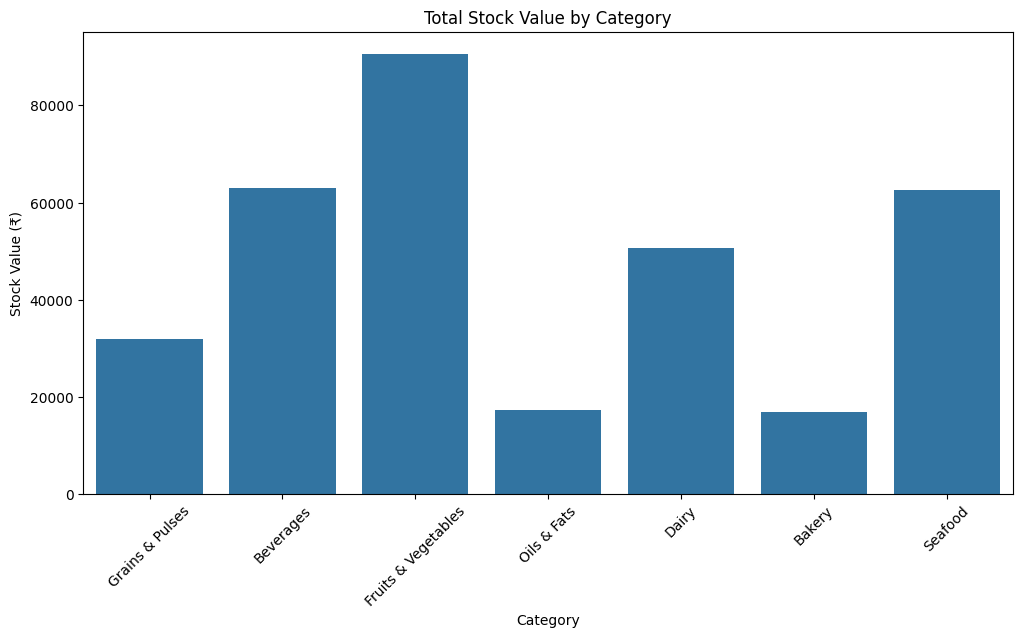

In [60]:
# Total stock value by category
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Category', y='Stock_Value', estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title("Total Stock Value by Category")
plt.ylabel("Stock Value (₹)")
plt.show()

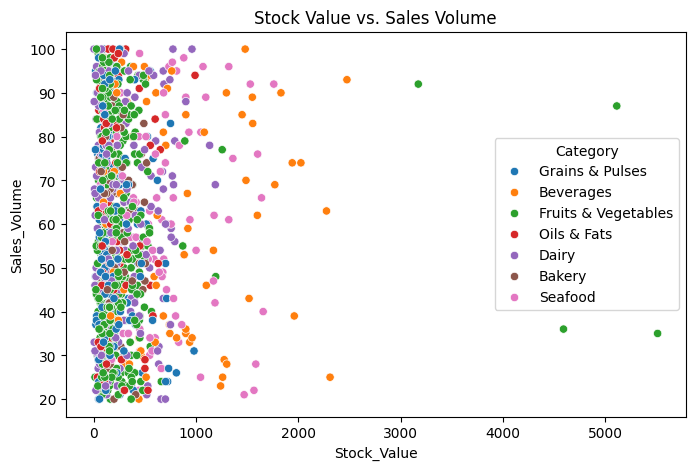

In [61]:
# Stock values vs sale volume
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Stock_Value', y='Sales_Volume', hue='Category')
plt.title("Stock Value vs. Sales Volume")
plt.show()

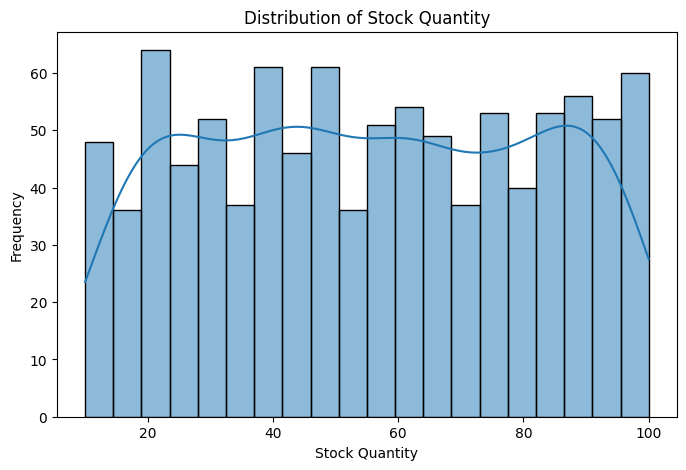

In [62]:
# Stock quantity distributiion
plt.figure(figsize=(8, 5))
sns.histplot(df['Stock_Quantity'], bins=20, kde=True)
plt.title("Distribution of Stock Quantity")
plt.xlabel("Stock Quantity")
plt.ylabel("Frequency")
plt.show()

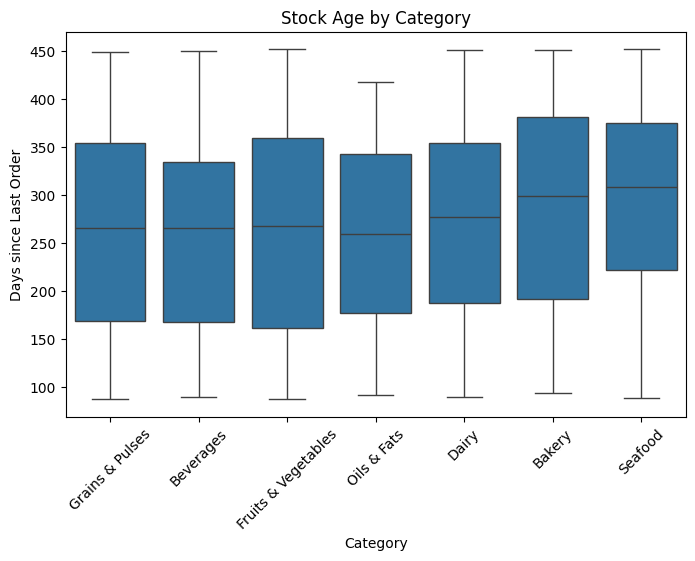

In [63]:
# Stock age analysis
df['Stock_Age'] = (pd.to_datetime('today') - pd.to_datetime(df['Last_Order_Date'])).dt.days

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Category', y='Stock_Age')
plt.xticks(rotation=45)
plt.title("Stock Age by Category")
plt.ylabel("Days since Last Order")
plt.show()

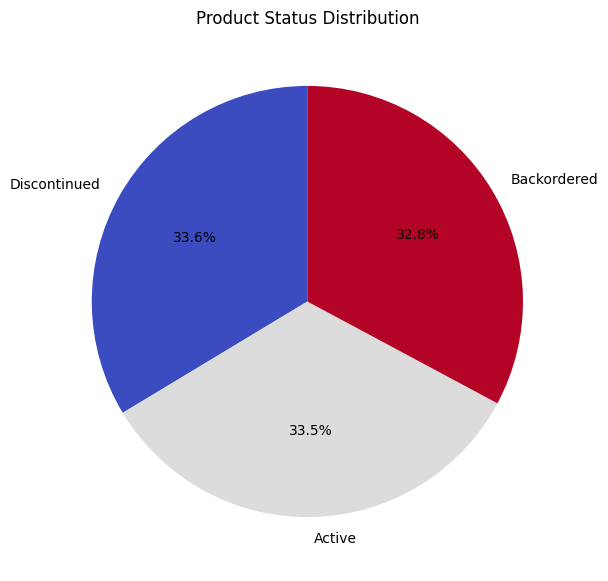

In [64]:
# Status distribution
plt.figure(figsize=(7, 7))
df['Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title("Product Status Distribution")
plt.ylabel("")
plt.show()